In [1]:
import os
import json
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

In [2]:
def read_label(json_path):
    with open(json_path, 'r') as f:
        label = json.load(f)
    output = []
    for ele in label:
        output += [w for w in ele['l']]
    return output

In [3]:
TRAIN_DIR = f'data/train/'
TEST_DIR = f'data/public_test'
VERSION = '250h_pretrained'
VALID_PRED_DIR = f'valid_predictions/{VERSION}/'

In [4]:
def compute_iou(s1, e1, s2, e2):
    # intersection = np.maximum(np.minimum(e1-s2, e2-s1), 0)
    ixmin = np.maximum(s1, s2)
    ixmax = np.minimum(e1, e2)
    intersection = np.maximum(ixmax-ixmin, 0.)
    # print(intersection)
    union = (e2-s2) + (e1-s1) - intersection
    # print(union)
    return (intersection / union).mean()

In [5]:
all_ious = []
for fname in tqdm(os.listdir(VALID_PRED_DIR)):
    name = fname.replace('.json', '')
    gt_path = f'{TRAIN_DIR}/labels/{name}.json'
    pred_path = f'valid_predictions/{VERSION}/{name}.json'

    gt = read_label(gt_path)
    pred = read_label(pred_path)

    gt_s = np.array([x['s'] for x in gt])
    gt_e = np.array([x['e'] for x in gt]) 
    pred_s = np.array([x['s'] for x in pred])
    pred_e = np.array([x['e'] for x in pred])

    iou = compute_iou(gt_s, gt_e, pred_s, pred_e)
    all_ious.append(iou)

100%|██████████| 1057/1057 [00:00<00:00, 2535.30it/s]


{'whiskers': [<matplotlib.lines.Line2D at 0x7fc6d9663240>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc6d96637b8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc6d9651f98>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc6d9663d68>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc6d9672080>],
 'means': []}

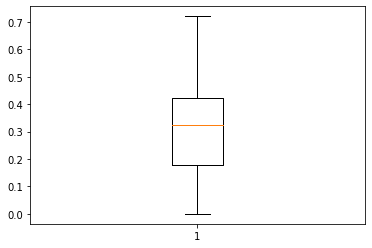

In [6]:
plt.boxplot(all_ious)

In [7]:
np.mean(all_ious)

0.30628141127338815